In [60]:
import tarfile
import gzip
from collections import Counter
from pathlib import Path
import random
import textwrap

DATA_DIR = Path(".")
GROBID_TAR = DATA_DIR / "acl_corpus_grobid_full_text.80k.v9_22.tar.gz"
BIB_GZ     = DATA_DIR / "acl_corpus_bibs.80k.v9_22.tar.gz"
META_PARQUET = DATA_DIR / "acl-publication-info.74k.parquet"


In [ ]:
import tarfile
from pathlib import Path
from collections import Counter

GROBID_TAR = Path("acl_corpus_grobid_full_text.80k.v9_22.tar.gz")

tar = tarfile.open(GROBID_TAR, "r")
members = tar.getmembers()

# all .tei.xml files
tei_members = [
    m for m in members
    if m.isfile() and m.name.endswith(".tei.xml")
]

# keep only "non-trivial" TEI files, e.g. > 1 KB
tei_members_nontrivial = [m for m in tei_members if m.size > 1024]


71641

In [ ]:
import pandas as pd
from pathlib import Path

meta = pd.read_parquet(META_PARQUET) 
meta.head(), meta.columns


(     acl_id                                           abstract  \
 0  O02-2002  There is a need to measure word similarity whe...   
 1  L02-1310                                                      
 2  R13-1042  Thread disentanglement is the task of separati...   
 3  W05-0819  In this paper, we describe a word alignment al...   
 4  L02-1309                                                      
 
                                            full_text  corpus_paper_id  \
 0  There is a need to measure word similarity whe...         18022704   
 1                                                             8220988   
 2  Thread disentanglement is the task of separati...         16703040   
 3  In this paper, we describe a word alignment al...          1215281   
 4                                                            18078432   
 
                                    pdf_hash  numcitedby  \
 0  0b09178ac8d17a92f16140365363d8df88c757d0          14   
 1  8d5e31610bc82c2abc86bc20ce

In [57]:
outgoing = defaultdict(list)
incoming = defaultdict(list)

for u, v in edges:
    outgoing[u].append(v)
    incoming[v].append(u)


In [34]:
acl_meta_ids = set(meta_acl["acl_id"].tolist())

linked_ids = [
    pid for pid in acl_meta_ids
    if pid in outgoing and outgoing[pid]
]

len(linked_ids)


9319

In [35]:
import random

small_linked_ids = random.sample(linked_ids, min(800, len(linked_ids)))
len(small_linked_ids)


800

In [36]:
meta_acl_by_id = {
    row["acl_id"]: row.to_dict()
    for _, row in meta_acl.iterrows()
}


In [37]:
final_records = []

for pid in small_linked_ids:
    m = meta_acl_by_id[pid]

    record = {
        "paper_id": pid,
        "title": m.get("title"),
        "abstract": m.get("abstract"),
        "full_text": m.get("full_text"),
        "year": m.get("year"),
        "month": m.get("month"),
        "booktitle": m.get("booktitle"),
        "authors": m.get("author"),  # may be a string or list depending on how it's stored
        "venue": m.get("journal") or m.get("booktitle"),
        "doi": m.get("doi"),
        "numcitedby_s2": m.get("numcitedby"),
        "s2_id": m.get("corpus_paper_id"),
        "url": m.get("url"),
        "publisher": m.get("publisher"),
        "address": m.get("address"),
        # graph-level info
        "outgoing_acl_citations": sorted(set(outgoing.get(pid, []))),
        "incoming_acl_citations": sorted(set(incoming.get(pid, []))),
    }

    final_records.append(record)

len(final_records), final_records[0]["paper_id"], final_records[0]["outgoing_acl_citations"][:5]


(800,
 '2020.wmt-1.91',
 ['D16-1160', 'P16-1009', 'P19-1021', 'W17-4714', 'W18-2703'])

In [38]:
import json

with open("acl_small_fulltext_linked.parquet_based.json", "w", encoding="utf-8") as f:
    json.dump(final_records, f, ensure_ascii=False, indent=2)


In [39]:
import sys
from pathlib import Path

# point this to the directory that contains the ReferenceTreeTools folder
PROJECT_ROOT = Path("C:\\Users\\User\\Desktop\\Julian\\Uni\\WS 25\\AIR\\herBERT").resolve()

sys.path.append(str(PROJECT_ROOT))

from ReferenceTreeTools.ReferenceTreeBuilder import ReferenceTreeBuilder


In [ ]:
from collections import defaultdict

def build_acl_citation_edges(ids):
    edges = []
    for pid in ids:
        tei_member = tei_by_id[pid]
        with tar.extractfile(tei_member) as f:
            xml_bytes = f.read()
        try:
            refs = extract_refs_from_tei_with_acl(xml_bytes)
        except Exception as e:
            continue
        for r in refs:
            cid = r.get("acl_id")
            if cid and cid in tei_by_id:
                edges.append((pid, cid))
    return edges

edges = build_acl_citation_edges(common_ids)
len(edges)


KeyboardInterrupt: 

: 

Random root: 2021.nlp4if-1.20
Visited nodes: 10
Edges in small subgraph: 11
Stored tree: c:\Users\User\Desktop\Julian\Uni\WS 25\AIR\herBERT\Datasets\Training Data\ACL\output\rtb_tree_2021.nlp4if-1.20.json

Legend (color = depth):
      (blue) reverse crawl depth       (white) root       (red) crawl depth

Nodes:
  2020.emnlp-main.470: {}
  P19-1285: {}
  W19-4619: {}
  2020.wnut-1.49: {}
  S17-2001: {}
  N16-3003: {}
  N19-1423: {}
  P19-1113: {}
  N19-4013: {}
  2021.nlp4if-1.20: {}

Legend (color = weight):
      -1 (blue) undefined       0 (green) non critical       1 (red) critical

Edges:
  2020.wnut-1.49 -> P19-1285  weight=-1.000
  2020.wnut-1.49 -> N19-1423  weight=-1.000
  2020.wnut-1.49 -> N19-4013  weight=-1.000
  N19-1423 -> S17-2001  weight=-1.000
  2021.nlp4if-1.20 -> N16-3003  weight=-1.000
  2021.nlp4if-1.20 -> N19-1423  weight=-1.000
  2021.nlp4if-1.20 -> 2020.wnut-1.49  weight=-1.000
  2021.nlp4if-1.20 -> P19-1113  weight=-1.000
  2021.nlp4if-1.20 -> 2020.emnlp-main.4

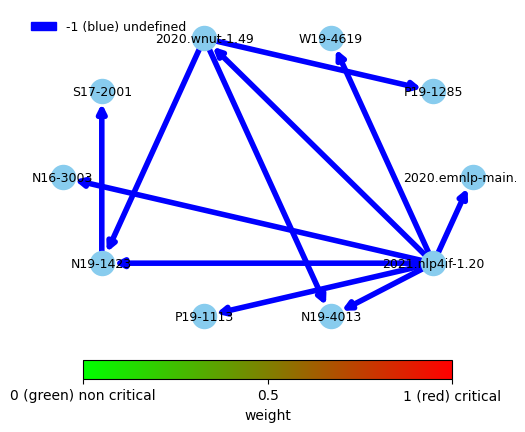

In [53]:
import random
from collections import deque
import os

# ---------------------------------------------------------------------
# 1) Pick a random root node that has outgoing citations
# ---------------------------------------------------------------------

candidate_nodes = [pid for pid, vs in outgoing.items() if len(vs) > 0]
root = random.choice(candidate_nodes)
print("Random root:", root)

# ---------------------------------------------------------------------
# 2) Build a tiny citation neighborhood (BFS)
# ---------------------------------------------------------------------

MAX_DEPTH = 10
REVERSE_DEPTH = 10

# Build incoming edges if not defined
incoming = {}
for u, vs in outgoing.items():
    for v in vs:
        incoming.setdefault(v, []).append(u)

visited = set([root])
queue = deque([(root, 0)])

# --- Forward BFS: papers ROOT cites ---
while queue:
    pid, depth = queue.popleft()
    if depth >= MAX_DEPTH:
        continue
    for neigh in outgoing.get(pid, []):
        if neigh not in visited:
            visited.add(neigh)
            queue.append((neigh, depth + 1))

# --- Reverse BFS: papers that cite ROOT ---
queue = deque([(root, 0)])
while queue:
    pid, depth = queue.popleft()
    if depth >= REVERSE_DEPTH:
        continue
    for neigh in incoming.get(pid, []):
        if neigh not in visited:
            visited.add(neigh)
            queue.append((neigh, depth + 1))

print("Visited nodes:", len(visited))

# ---------------------------------------------------------------------
# 3) Filter edges within this tiny subgraph
# ---------------------------------------------------------------------

mini_edges = [(u, v) for (u, v) in edges if u in visited and v in visited]
print("Edges in small subgraph:", len(mini_edges))

# ---------------------------------------------------------------------
# 4) Build reference tree
# ---------------------------------------------------------------------

from ReferenceTreeTools.ReferenceTreeBuilder import ReferenceTreeBuilder

rtb = ReferenceTreeBuilder()

# Add nodes
for pid in visited:
    rtb.addNode(pid)

# Add edges
for u, v in mini_edges:
    rtb.addEdge(u, v)

# Build internal structure
rtb.build()

# Store + reload (required for printTree / plotTree)
out_dir = os.path.join(os.getcwd(), "output")
os.makedirs(out_dir, exist_ok=True)

out_path = os.path.join(out_dir, f"rtb_tree_{root}.json")
rtb.store(out_path)

tree = rtb.load(out_path)

print("Stored tree:", out_path)

# ---------------------------------------------------------------------
# 5) Print + Plot
# ---------------------------------------------------------------------
tree.printTree()
tree.plotTree()


TODO:\
Wie werden die Textstellen im Paper behandelt?
Struktur
-> jedes Paper einen Index beschreibend wie kritisch
-> jede Edge einen weight

-> 


